# Lógica fuzzy: vendas de um produto: preço e satisfação do cliente

- Antecedentes:
    - Preço: baixo, médio & alto;
    - Satisfação: baixa, média & alta.

- Consequente:
    - Nível de vendas.

Conjunto de Regras:
1. preco baixo E satisfacao baixa => incremento 0.125;
2. preco baixo E satisfacao média => incremento 0.375;
3. preco baixo E satisfacao alta => incremento 0.625;
4. preco médio E satisfacao baixa => incremento 0;
5. preco médio E satisfacao média => incremento 0.5;
6. preco médio E satisfacao alta => incremento 0.875;
7. preco alto E satisfacao baixa => incremento 0.125;
8. preco alto E satisfacao média => incremento 0.375;
9. preco alto E satisfacao alta => incremento 0.125.

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
preco = ctrl.Antecedent(np.arange(3,18+1,1),
                        "preco")
satisfacao = ctrl.Antecedent(np.arange(0,1+1,1),
                             "satisfacao")

nivel_vendas = ctrl.Consequent(np.arange(0,1+0.1,0.125),
                               "nivel vendas")

In [3]:
preco['low'] = fuzz.trimf(preco.universe,
                          [-4.5,3,10.5])
preco['medium'] = fuzz.trimf(preco.universe,
                             [3,10.5,18])
preco['high'] = fuzz.trimf(preco.universe,
                           [10.5,18,25.5])

In [4]:
satisfacao['low'] = fuzz.gaussmf(satisfacao.universe,
                                 mean=0, sigma=0.2123)
satisfacao['medium'] = fuzz.gaussmf(satisfacao.universe,
                                    mean=0.5, sigma=0.2123)
satisfacao['high'] = fuzz.gaussmf(satisfacao.universe,
                                  mean=1, sigma=0.2123)

t:\college\College_tasks\7_Seventh_semester\AI\venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


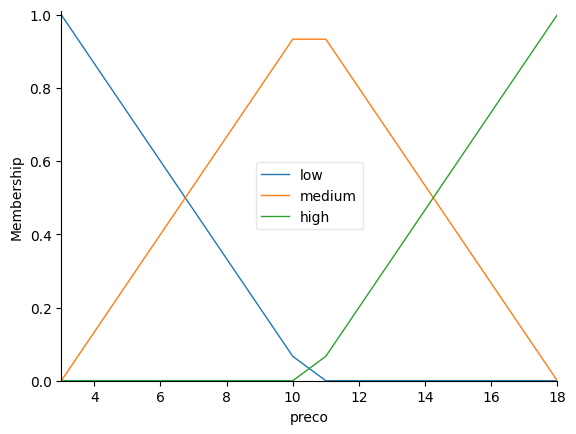

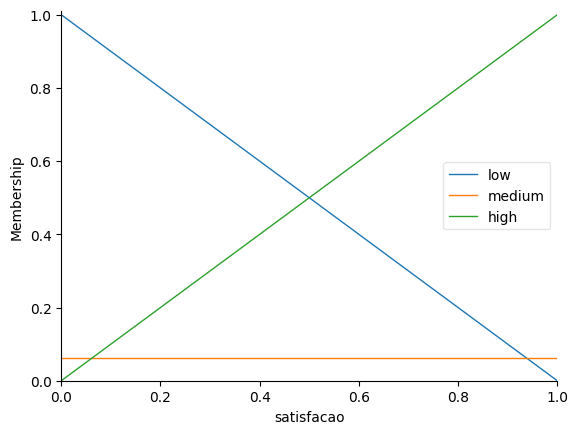

In [5]:
preco.view()
satisfacao.view()

In [6]:
nivel_vendas['mf1'] = fuzz.trimf(nivel_vendas.universe,
                                 [0,0,0])
nivel_vendas['mf2'] = fuzz.trimf(nivel_vendas.universe,
                                 [0.125,0.125,0.125])
nivel_vendas['mf3'] = fuzz.trimf(nivel_vendas.universe,
                                 [0.25,0.25,0.25])
nivel_vendas['mf4'] = fuzz.trimf(nivel_vendas.universe,
                                 [0.375,0.375,0.375])
nivel_vendas['mf5'] = fuzz.trimf(nivel_vendas.universe,
                                 [0.5,0.5,0.5])
nivel_vendas['mf6'] = fuzz.trimf(nivel_vendas.universe,
                                 [0.625,0.625,0.625])
nivel_vendas['mf7'] = fuzz.trimf(nivel_vendas.universe,
                                 [0.75,0.75,0.75])
nivel_vendas['mf8'] = fuzz.trimf(nivel_vendas.universe,
                                 [0.875,0.875,0.875])
nivel_vendas['mf9'] = fuzz.trimf(nivel_vendas.universe,
                                 [1,1,1])

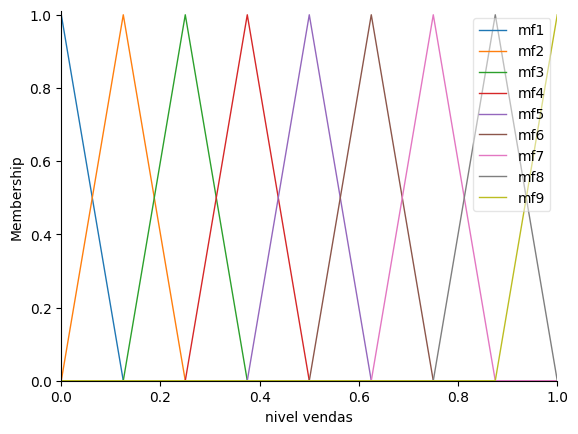

In [7]:
nivel_vendas.view()

## Regras do sistema

In [8]:
# Preço baixa
regra1 = ctrl.Rule(
    preco['low'] & satisfacao['low'],
    nivel_vendas['mf2']
)
regra2 = ctrl.Rule(
    preco['low'] & satisfacao['medium'],
    nivel_vendas['mf4']
)
regra3 = ctrl.Rule(
    preco['low'] & satisfacao['high'],
    nivel_vendas['mf6']
)
# Preço médio
regra4 = ctrl.Rule(
    preco['medium'] & satisfacao['low'],
    nivel_vendas['mf1']
)
regra5 = ctrl.Rule(
    preco['medium'] & satisfacao['medium'],
    nivel_vendas['mf5']
)
regra6 = ctrl.Rule(
    preco['medium'] & satisfacao['high'],
    nivel_vendas['mf8']
)
# Preço alto
regra7 = ctrl.Rule(
    preco['high'] & satisfacao['low'],
    nivel_vendas['mf2']
)
regra8 = ctrl.Rule(
    preco['high'] & satisfacao['medium'],
    nivel_vendas['mf4']
)
regra9 = ctrl.Rule(
    preco['high'] & satisfacao['high'],
    nivel_vendas['mf2']
)

## Sistema de controle

In [9]:
sistema_controle = ctrl.ControlSystem(
    [regra1, regra2, regra3,
     regra4, regra5, regra6,
     regra7, regra8, regra9])
sistema = ctrl.ControlSystemSimulation(sistema_controle)

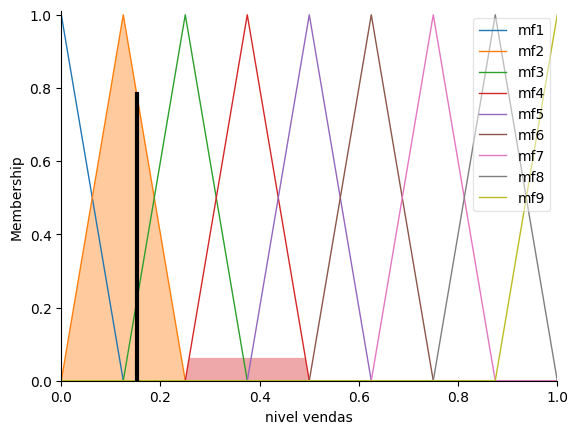

In [10]:
# Testagem: preço baixo e satisfação baixa
sistema.input['preco'] = 3
sistema.input['satisfacao'] = 0
sistema.compute()

nivel_vendas.view(sim = sistema)